## IA376I – Tópicos em Engenharia de Computação VII
### Tópico: Análise de Dados Visual (Visual Analytics)
**Professora:** Wu, Shin - Ting<br>
**Aluno:** Luiz Roberto Albano Junior **RA:** 272746<br>

---

**Aula 06 - 19/04/2024**


### Exercícios 5.6

#### Item 2: Usando o mesmo conjunto de dados Galton, plote:

##### Carregamento dos dados e bibliotecas

In [2]:
import pandas as pd 
from plotnine import *

galton = pd.read_csv("Galton.csv")
galton

,rownames,parent,child
0,1,70.5,61.7
1,2,68.5,61.7
2,3,65.5,61.7
3,4,64.5,61.7
4,5,64.0,61.7
...,...,...,...
923,924,69.5,73.7
924,925,69.5,73.7
925,926,69.5,73.7
926,927,69.5,73.7


##### a) gráficos de distribuição de frequência das alturas dos pais e das crianças para avaliar o grau de simitria das distrituições.

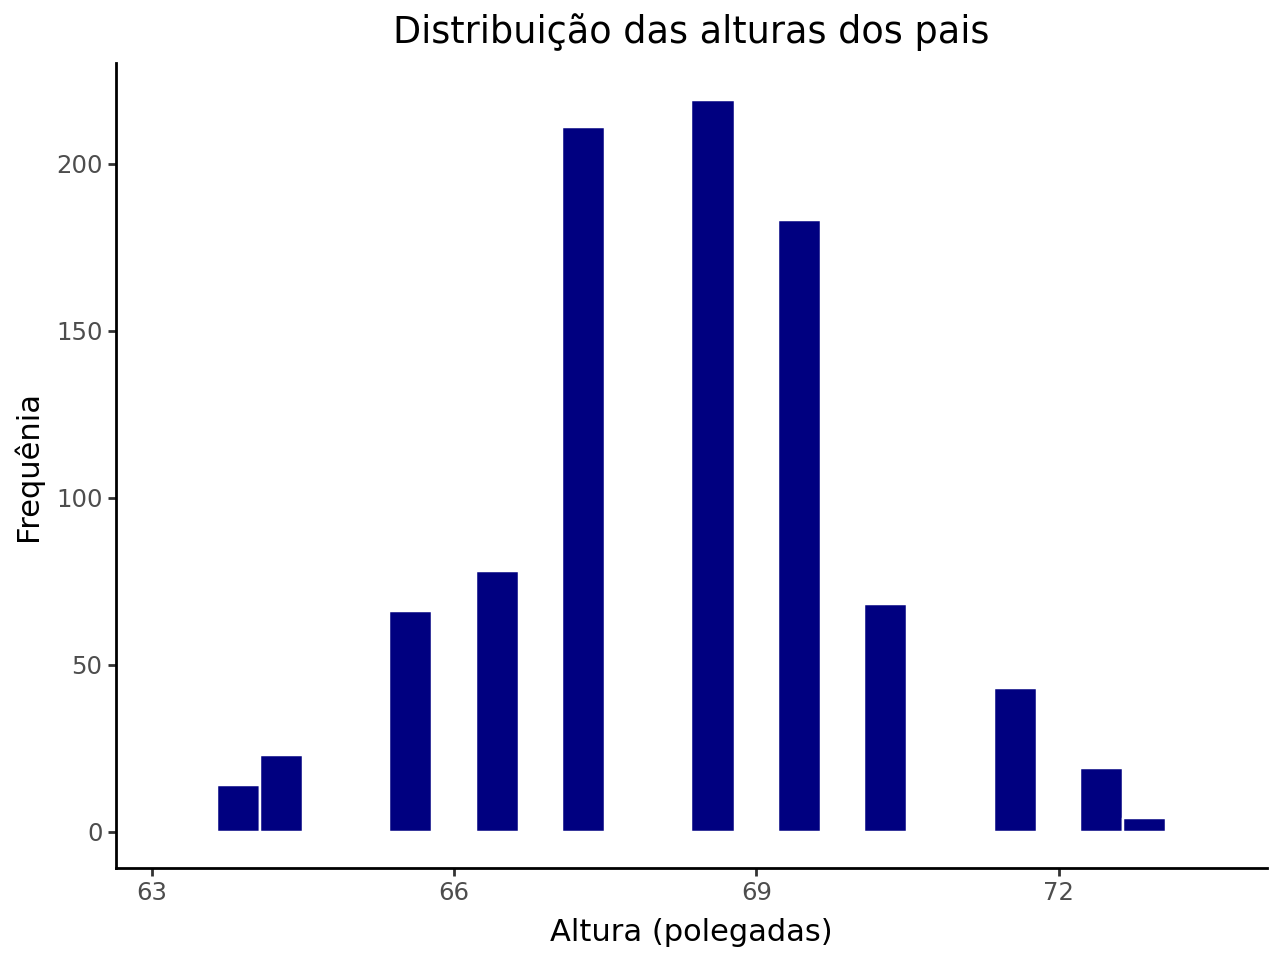

In [41]:
(
    ggplot(galton, aes(x="parent"))
    + geom_histogram(fill="navy", color="white")
    + scale_x_continuous(expand=(0,1) )
    + labs(title="Distribuição das alturas dos pais",
        x="Altura (polegadas)", y="Frequênia")
    + theme_classic()
)

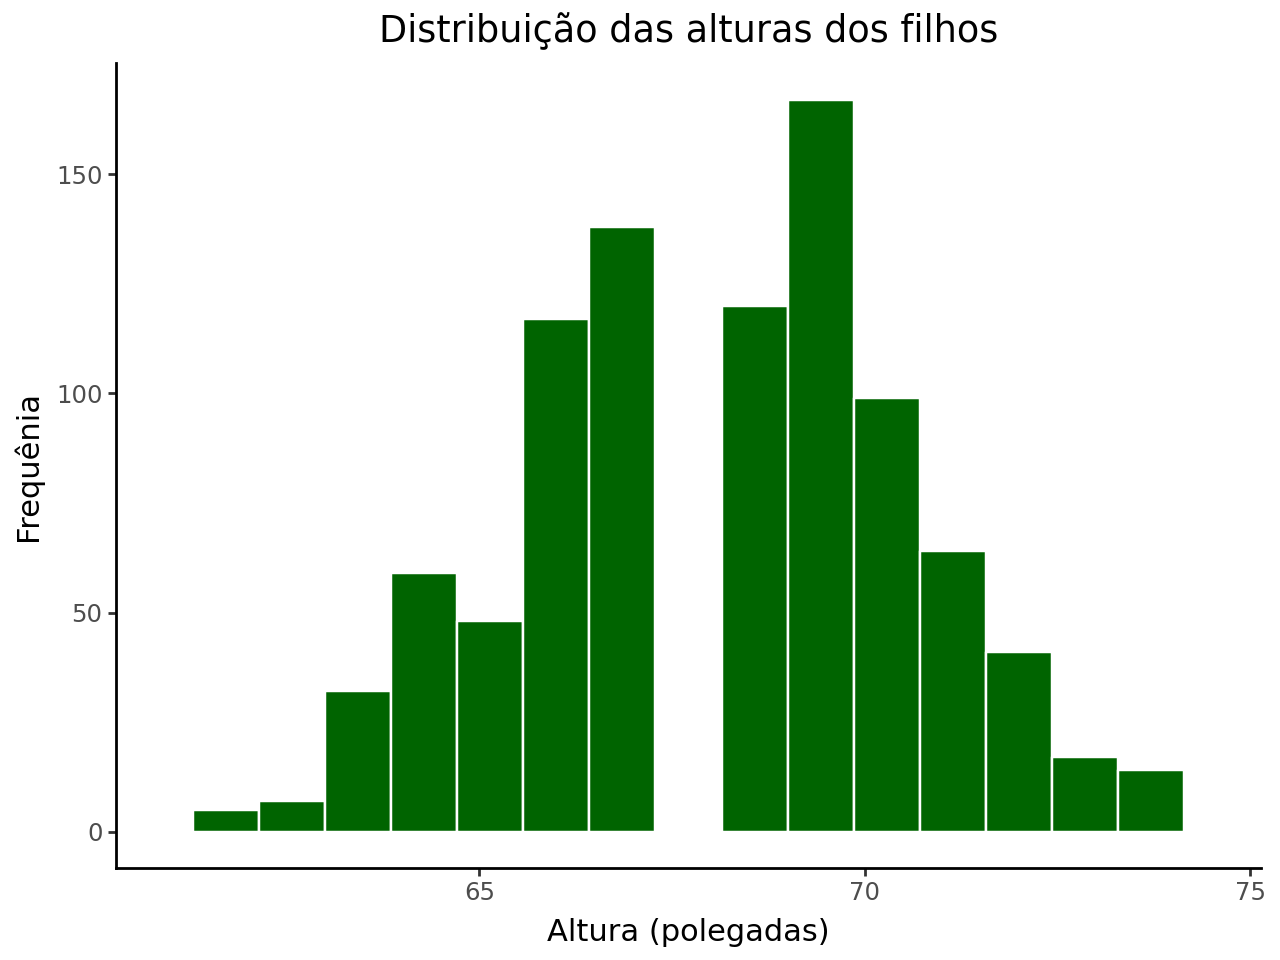

In [42]:
(
    ggplot(galton, aes(x="child"))
    + geom_histogram(fill="darkgreen", color="white")
    + scale_x_continuous(expand=(0,1) )
    + labs(title="Distribuição das alturas dos filhos",
        x="Altura (polegadas)", y="Frequênia")
    + theme_classic()
)

##### b) gráficos de distribuição acumulada de frequências das alturas das crianças e dos pais para determinar as medianas das duas distribuições.

##### **Distribuição acumulada das crianças**

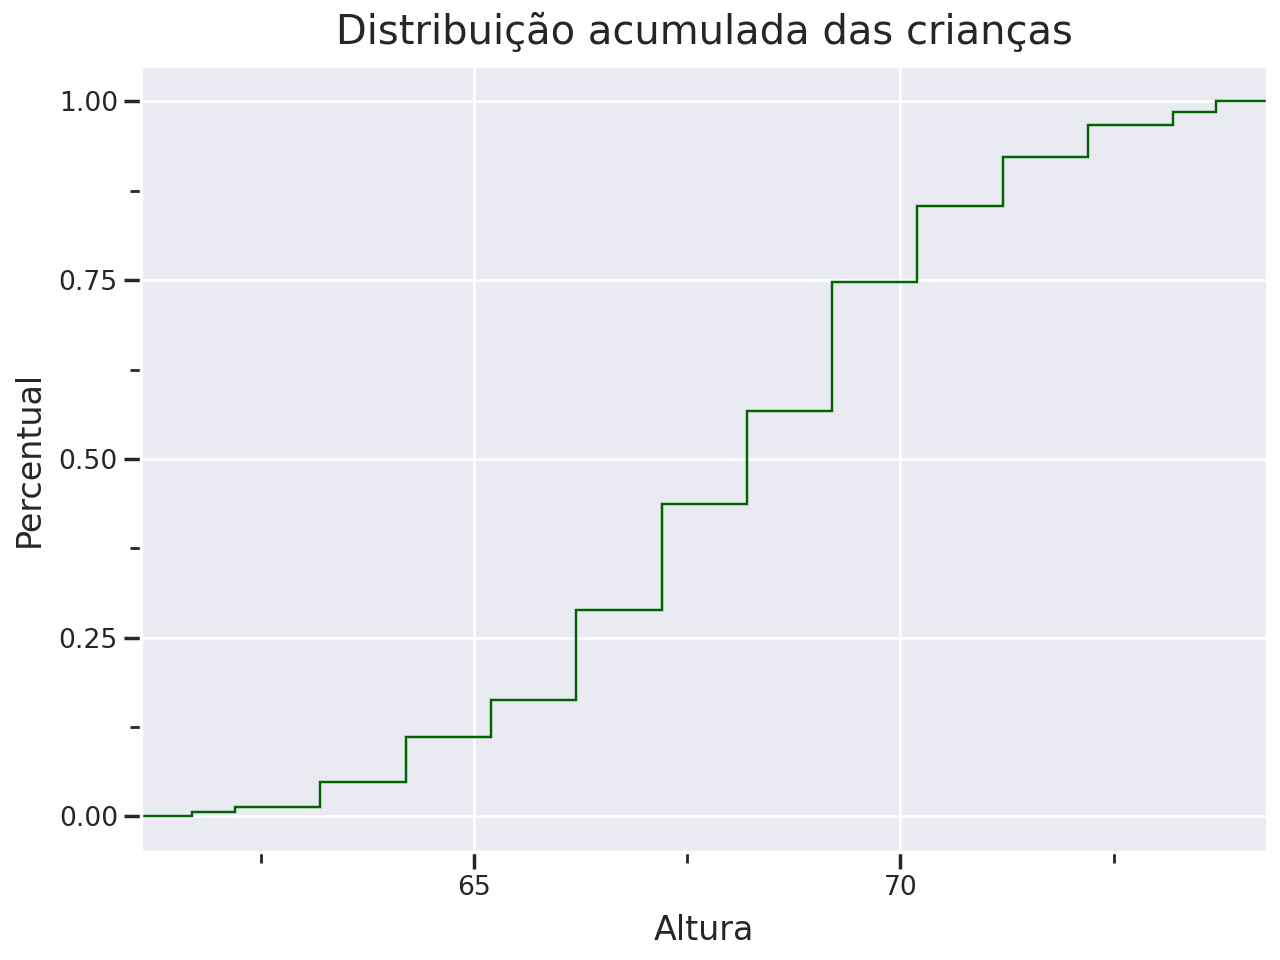

In [43]:
(
    ggplot(galton, aes(x='child'))
    + stat_ecdf(geom="step", color="darkgreen")
    + labs(title="Distribuição acumulada das crianças", x="Altura", y="Percentual")
    + theme_seaborn()
)

##### **Distribuição acumulada dos pais**

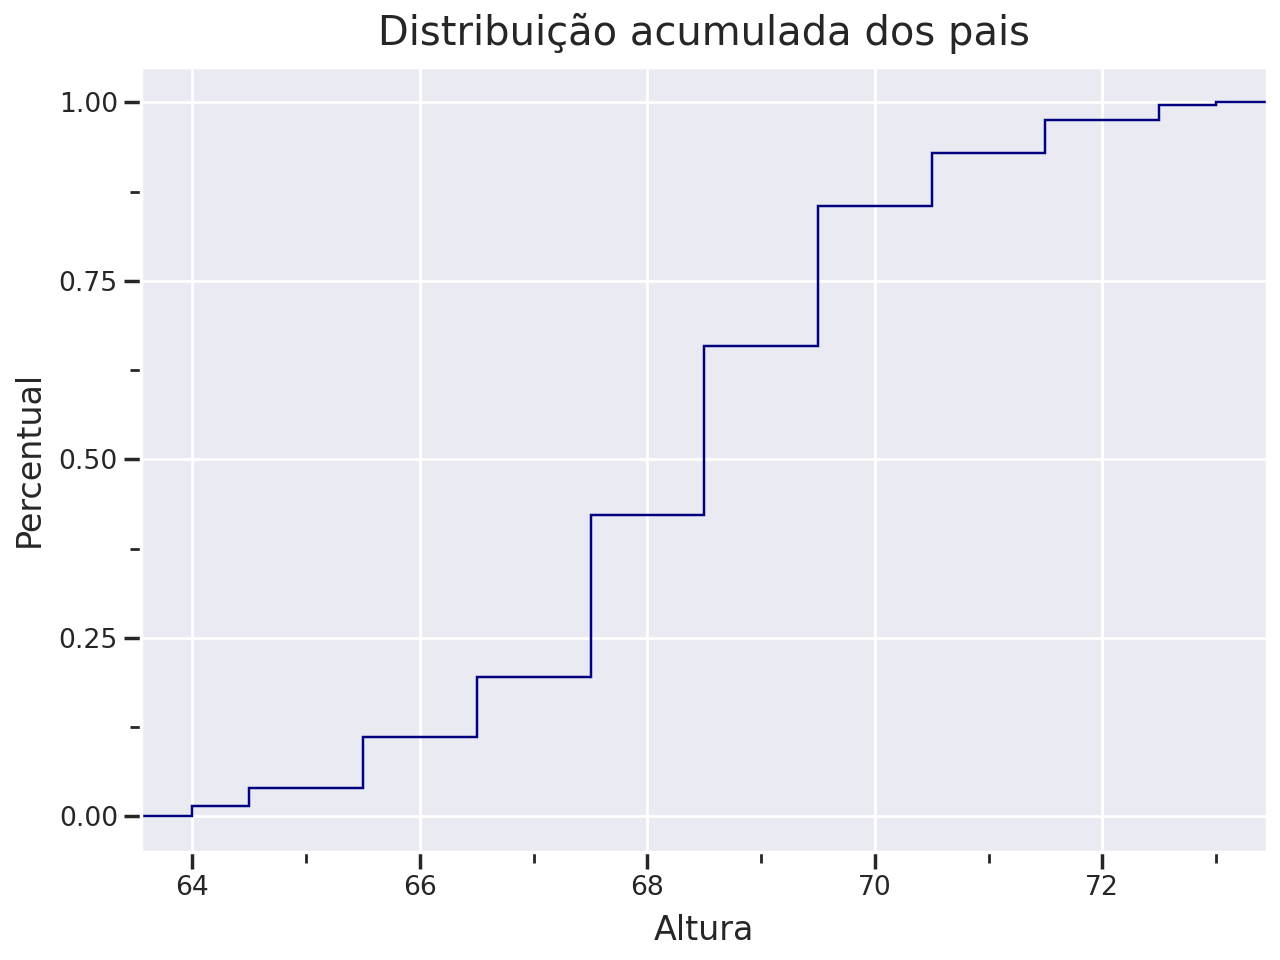

In [44]:
(
    ggplot(galton, aes(x='parent'))
    + stat_ecdf(geom="step", color="navy")
    + labs(title="Distribuição acumulada dos pais", x="Altura", y="Percentual")
    + theme_seaborn()
)

##### c) gráficos de caixa para comparar as estatísticas dos pais com as das crianças

In [46]:
# Tratamento dos dados
galton_melted = galton.melt(
    value_vars=["parent", "child"],
    var_name="Grupo",
    value_name="Altura"
)
galton_melted

,Grupo,Altura
0,parent,70.5
1,parent,68.5
2,parent,65.5
3,parent,64.5
4,parent,64.0
...,...,...
1851,child,73.7
1852,child,73.7
1853,child,73.7
1854,child,73.7


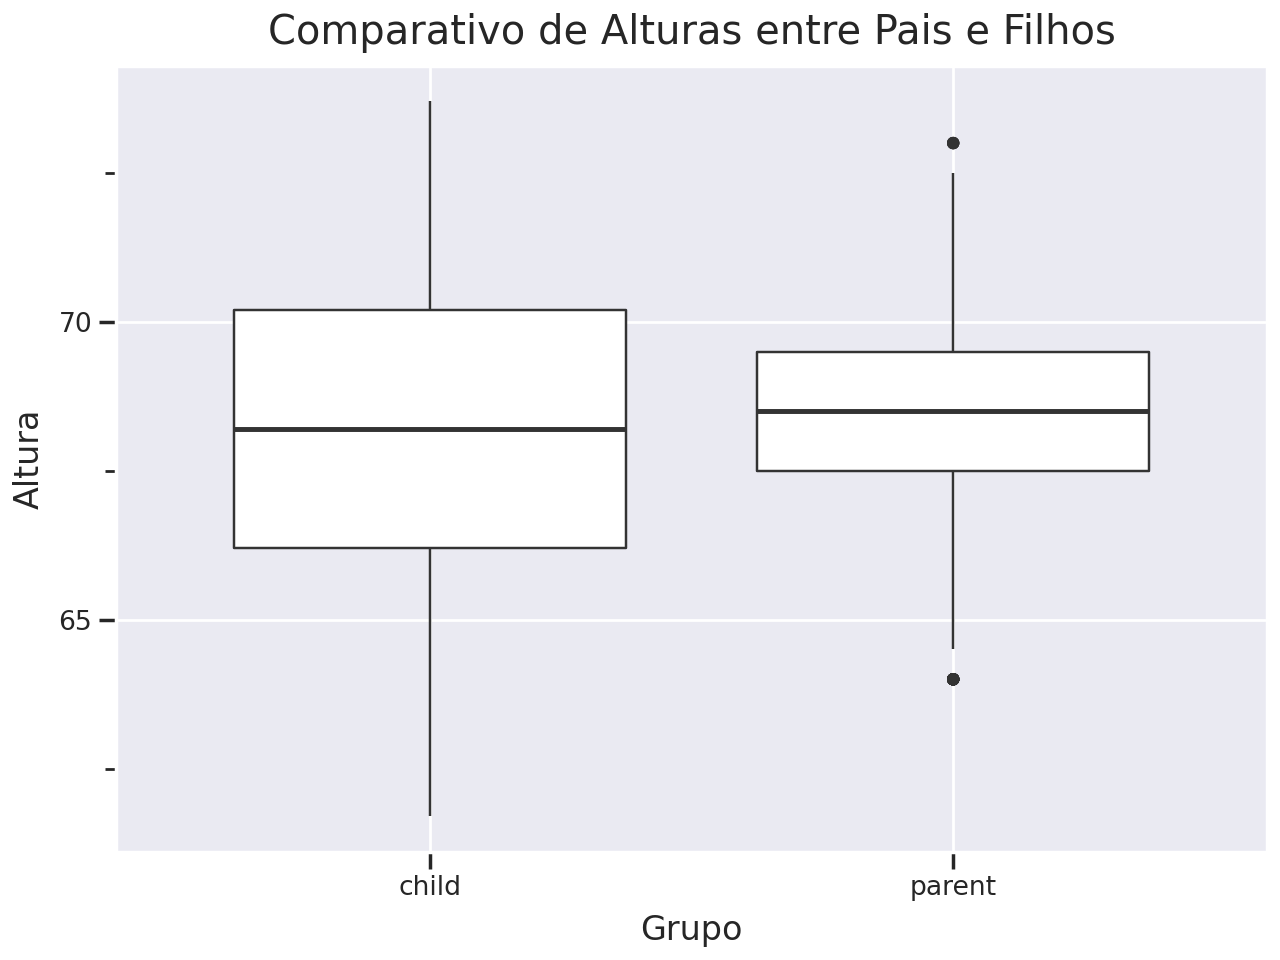

In [47]:
#Plotagem do gráfico
(
    ggplot(galton_melted, aes(x="Grupo", y="Altura"))
    + geom_boxplot()
    + labs(title="Comparativo de Alturas entre Pais e Filhos",
           x="Grupo", y="Altura")
    + theme_seaborn()
)


##### d) gráficos de quantil-quantil para verificar se a distribuição das alturas dos pais segue uma distribuição Gaussiana.

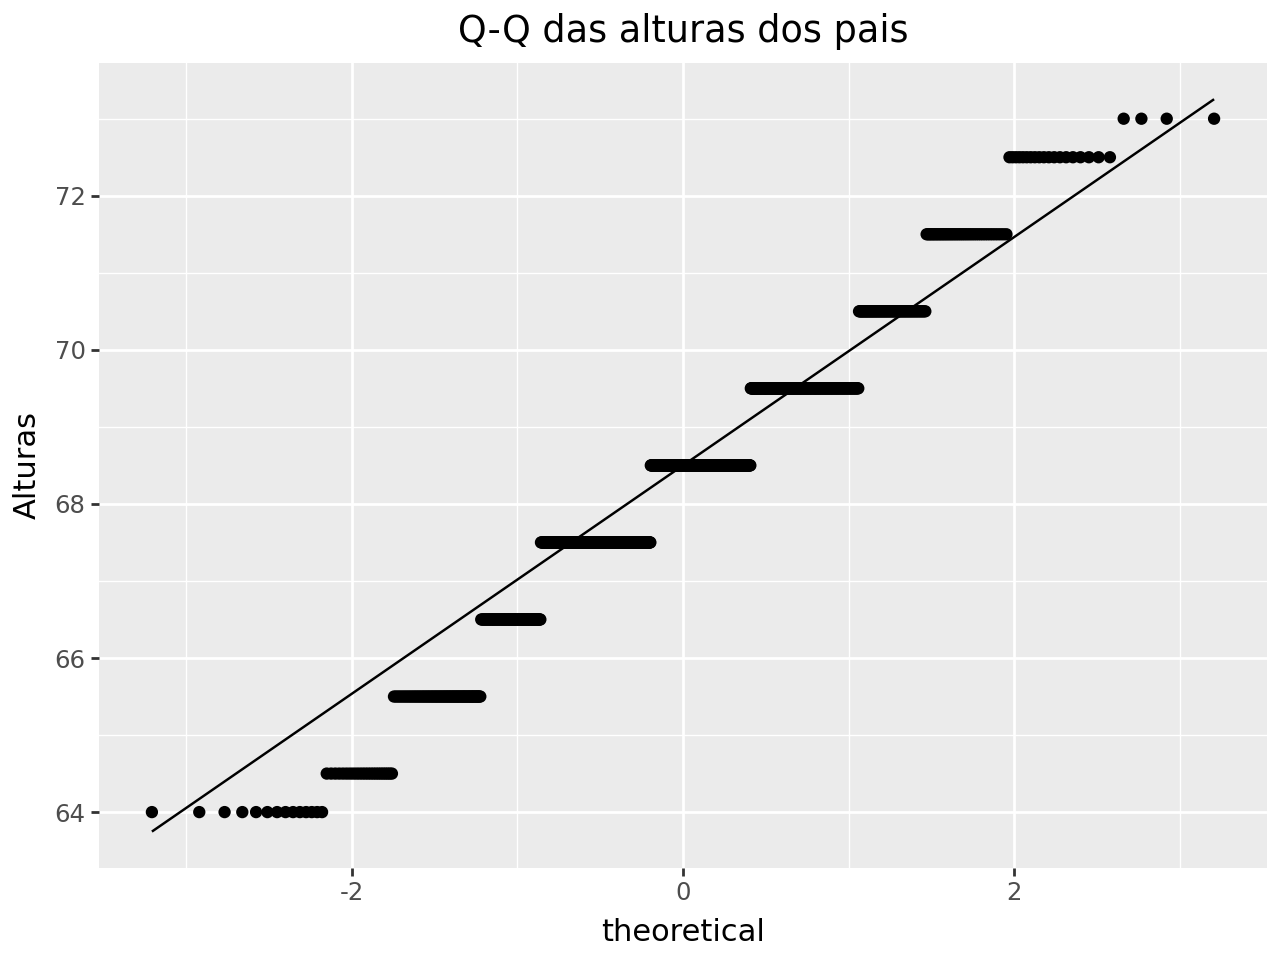

In [48]:
(
    ggplot(galton, aes(sample="parent"))
    + geom_qq()
    + geom_qq_line()
    + labs(title="Q-Q das alturas dos pais", y="Alturas")
)

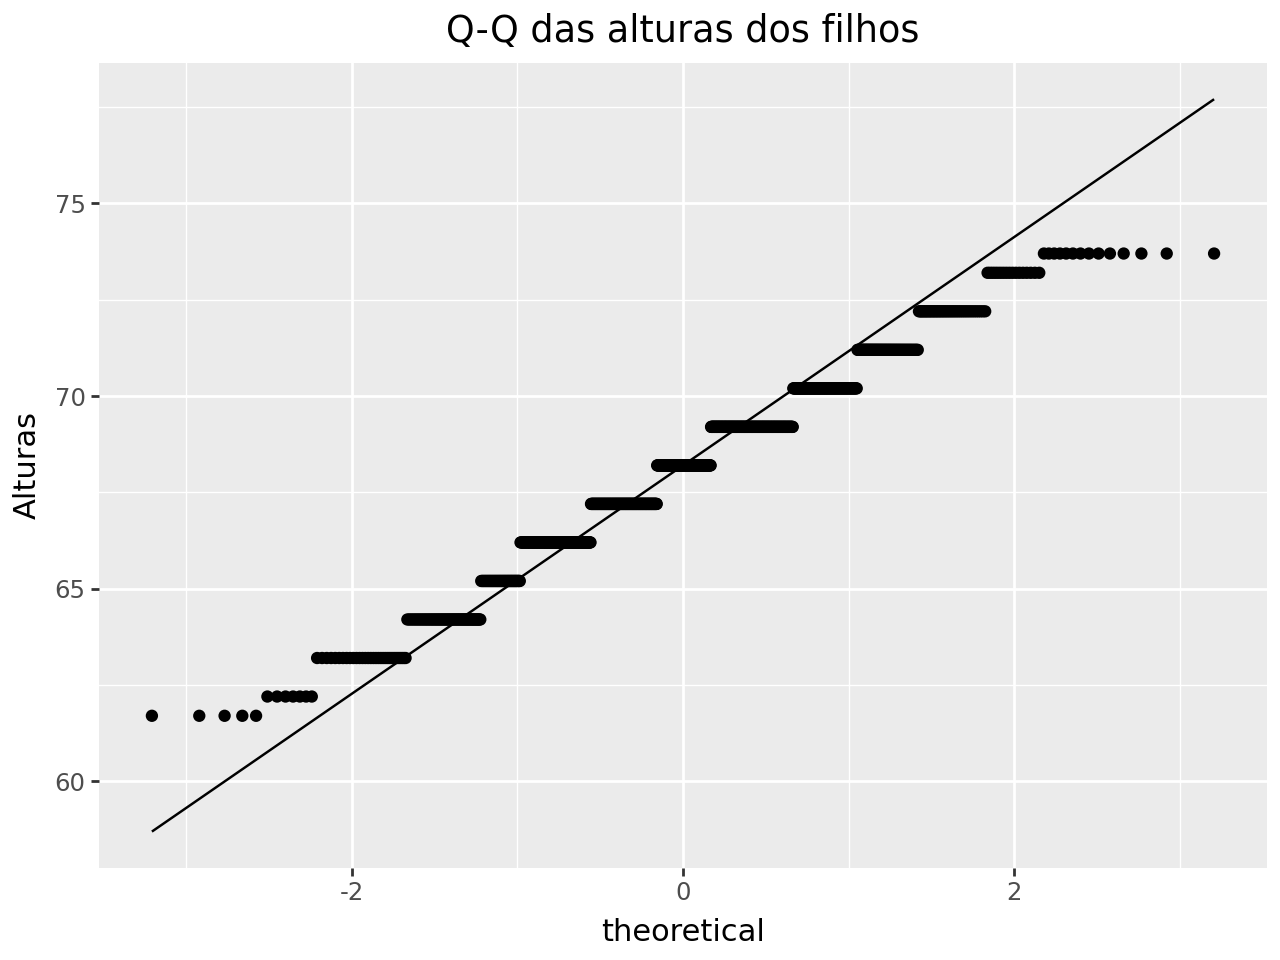

In [49]:
(
    ggplot(galton, aes(sample="child"))
    + geom_qq()
    + geom_qq_line()
    + labs(title="Q-Q das alturas dos filhos", y="Alturas")
)

##### e) gráfico de dispersão para verificar se há correlação entre as alturas das crianças e as alturas dos pais.

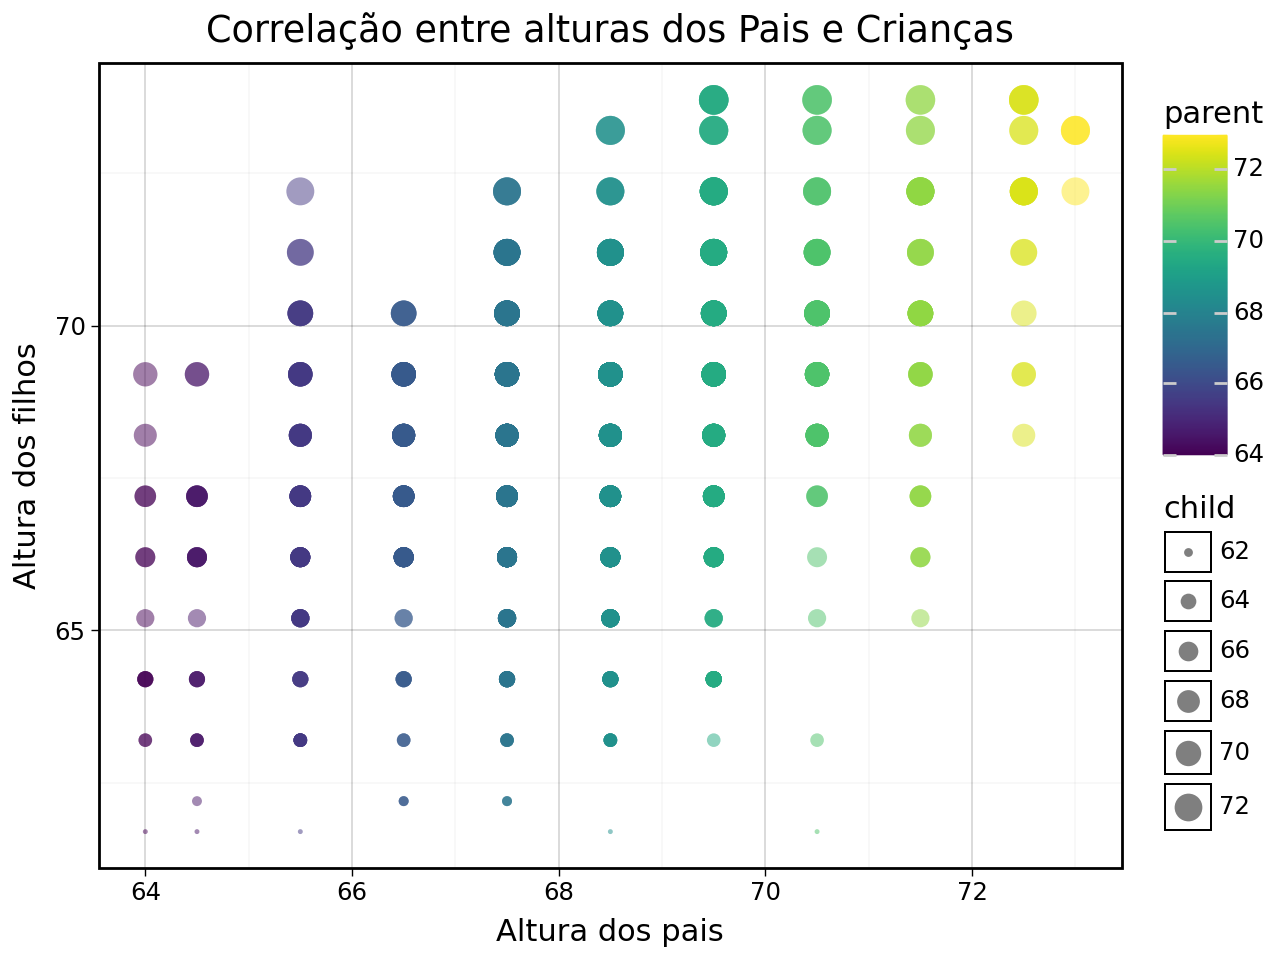

In [66]:
(
    ggplot(galton, aes(x="parent", y="child", size="child"))
    + geom_point(alpha=0.5, mapping=aes(fill="parent"), stroke=0)
    + labs(title='Correlação entre alturas dos Pais e Crianças',
         x='Altura dos pais',
         y='Altura dos filhos')
    + theme_linedraw()
)

##### f) mapa de calor dos dados para identificar a quantidade de clusters subjacentes e compare com a quantidade de grupos de pontos de dados mostrados no gráfico de dispersão no item 2e.

O exemplo abaixo foi apresentado em aula:

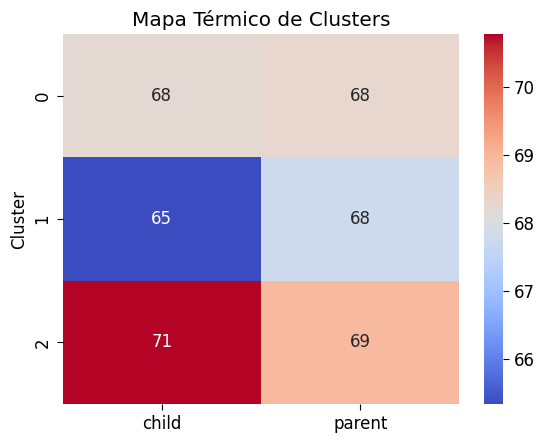

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Aplicar K-Means para identificar clusters
# El número de clusters (n_clusters) puede ajustarse según la observación o evaluación previa
kmeans = KMeans(n_clusters=3, random_state=0).fit(galton)

# Asignar las etiquetas de cluster al DataFrame original
galton['Cluster'] = kmeans.labels_

# Crear un mapa térmico usando el promedio de alturas en cada cluster
pivot_table = galton.pivot_table(index='Cluster', values=['parent', 'child'], aggfunc='mean')
heatmap = sns.heatmap(pivot_table, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Mapa Térmico de Clusters')
plt.show()

Correção:

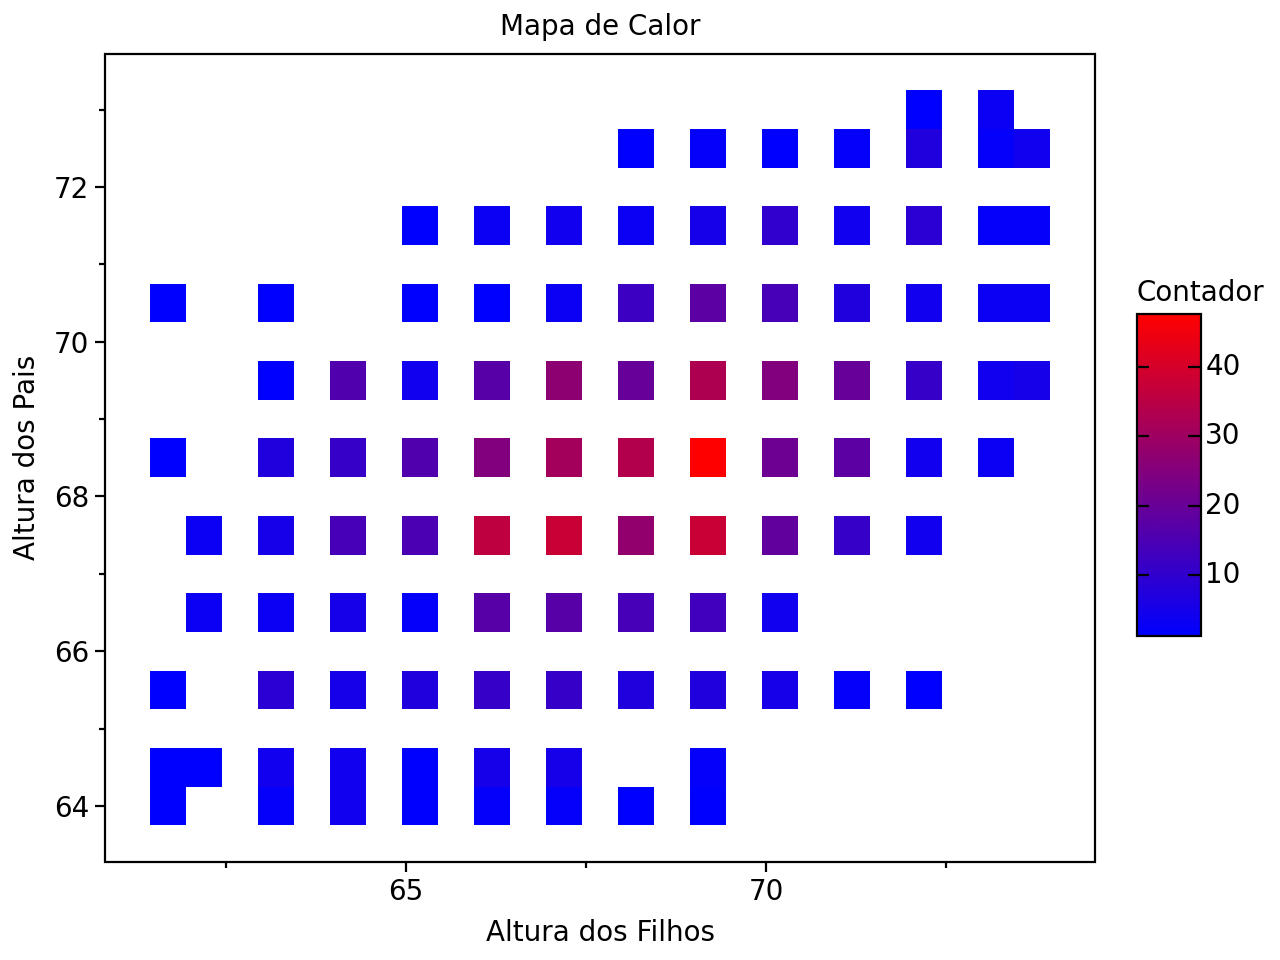

In [5]:
galton_counts = galton.groupby(["child", "parent"]).size().reset_index(name="count")
(
    ggplot(galton_counts, aes(x="child",y="parent",fill="count"))
    + geom_tile()
    + labs(title="Mapa de Calor", x="Altura dos Filhos", y="Altura dos Pais", fill="Contador")
    + scale_fill_gradient(low="blue", high="red")
    + theme_matplotlib()
)